<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

**1. Dataset Selection and Preprocessing**

*Choose a publicly available dataset suitable for a regression problem*

In [4]:
# Dataset is about Airbnb prices in New York City from Kaggle

import pandas as pd

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

# Neighbourhood group will be the target variable that we want to classify our predictions into based on historical listings & the various variables related to the target.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


*Cleaning data by handling missing values and removing duplicates*

In [5]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
# Drop missing values in name & host_name columns

df.dropna(subset=['name', 'host_name'], inplace=True)

In [7]:
# Fill empty cells in reviews per month with 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [8]:
# Last_review will be kept as is since i wont use it

In [9]:
print(f"Missing values after handling missing values:\n{df.isnull().sum()}")

Missing values after handling missing values:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [10]:
print("Number of duplicate rows:",{df.duplicated().sum()})

# No duplicates

Number of duplicate rows: {np.int64(0)}


In [11]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [12]:
# Convert last_review data type to date

df['last_review'] = pd.to_datetime(df['last_review'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# Datatypes

df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [14]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,2018-10-04 07:23:47.072976128,1.091124,7.148369,112.801425
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,2018-07-09 00:00:00,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,NaN,1.597270,32.964600,131.610962


*Converting categorical data using encoding techniques*

In [15]:
# Using label encoding

from sklearn.preprocessing import LabelEncoder

le_room = LabelEncoder()
le_neighbourhood = LabelEncoder()

df['room_type_encoded'] = le_room.fit_transform(df['room_type'])
df['neighbourhood_encoded'] = le_neighbourhood.fit_transform(df['neighbourhood_group'])  # I encoded neighbourhood group to use it in the correlation matrix

# 2 new columns with the integer labels is added to the original data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_encoded,neighbourhood_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,1,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,2


In [16]:
# Normalize numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numeric columns
numeric_features = ['room_type_encoded','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','neighbourhood_encoded']

# Fit scaler on training data and transform
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_encoded,neighbourhood_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,-0.015570,-0.300329,-0.320388,2018-10-19,-0.551649,-0.034837,1.916263,0.909492,-0.917929
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.300794,-0.300329,0.487703,2019-05-21,-0.445217,-0.156180,1.840280,-0.924128,0.441065
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,-0.011407,-0.200426,-0.522411,NaT,-0.683125,-0.186516,1.916263,0.909492,0.441065
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,-0.265330,-0.300329,5.538271,2019-07-05,2.221862,-0.186516,0.616965,-0.924128,-0.917929
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,-0.302795,0.149232,-0.320388,2018-11-19,-0.620518,-0.186516,-0.857091,-0.924128,0.441065


*Splitting the dataset into training and testing sets*

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['room_type_encoded','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
y = df['neighbourhood_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

**2. Exploratory Data Analysis (EDA)**

*Perform an exploratory data analysis to visualize and summarize the data*

*Distribution of classes*

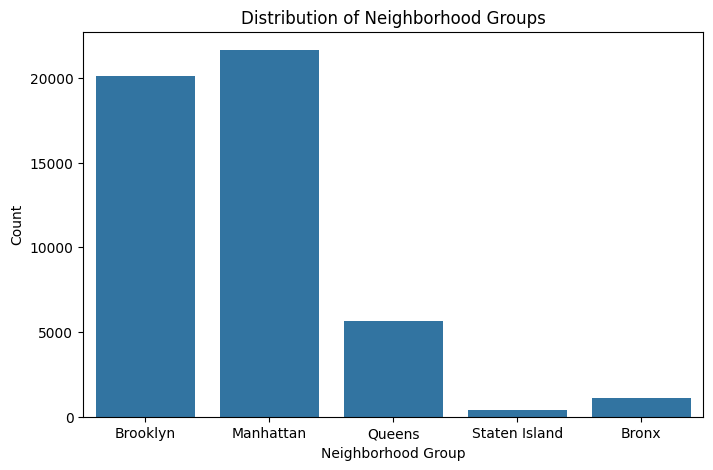

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Distribution of Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.show()

# Brooklyn & Manhattan neighborhoods have the highest number of listings which means people travel mostly to these areas

*Correlation between features*

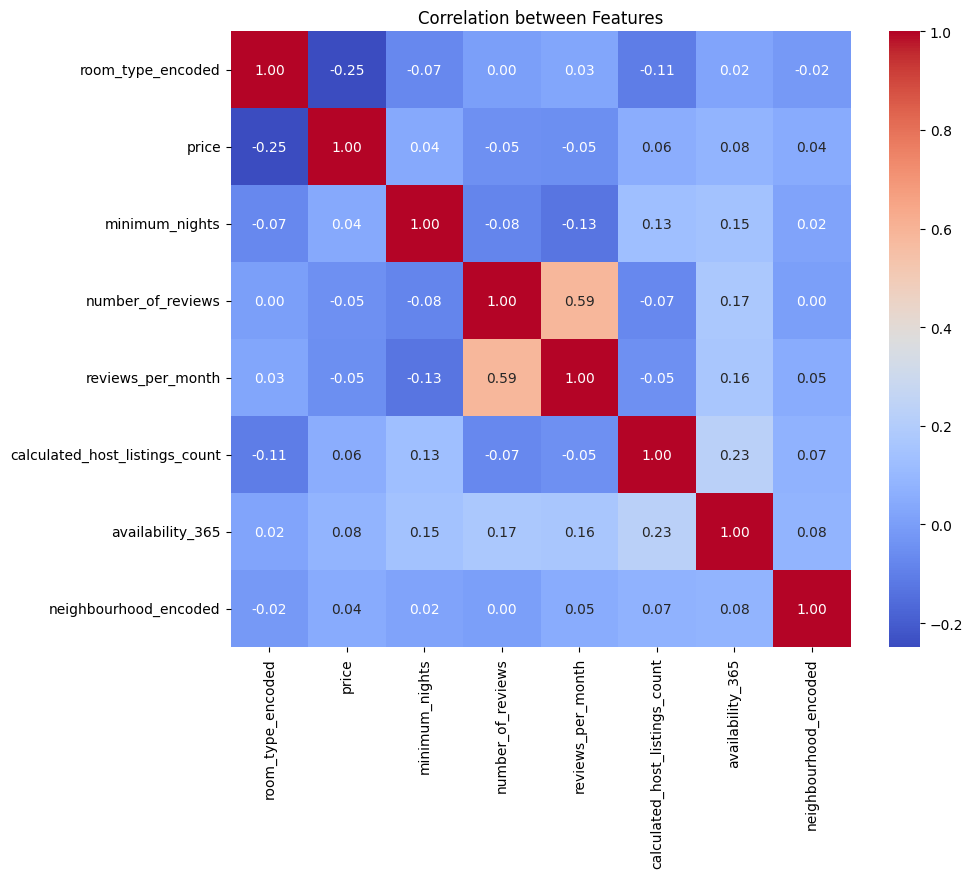

In [19]:

correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features')
plt.show()

# We have weak positive & negative relationships between all features except for number of reviews & reviews per month

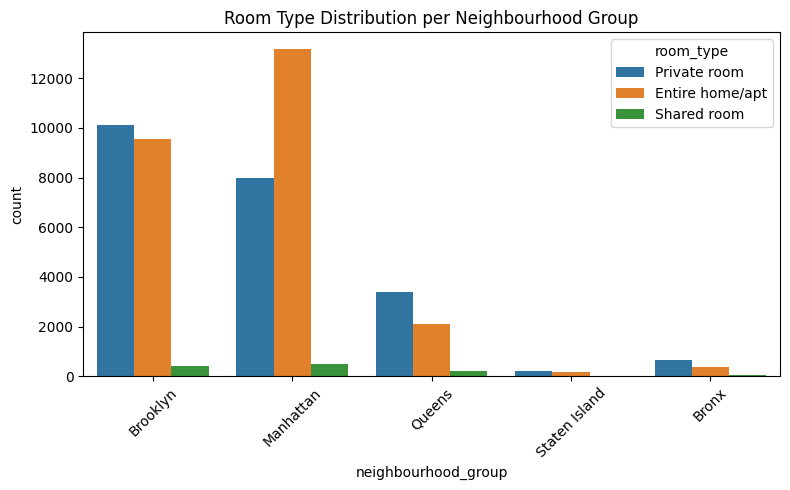

In [20]:
# Room types for each neighbourhood

plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title('Room Type Distribution per Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Private & entire homes are the most listed room types

*Any insights into the data that may affect the choice of classifier or the classification accuracy*

**Class Imbalance**

Some neighbourhood_group values like Manhattan & Brooklyn have significantly more listings than others like Staten Island.

Impact:
Classifiers like Logistic Regression may bias toward the majority class.

Metrics like accuracy become misleading — high accuracy might mean the model is just guessing the dominant class.


**Weak Correlation Among Features**

Correlation matrix shows weak relationships between most numerical features.

Impact:
Linear models might struggle to find strong decision boundaries.

Complex models like Random Forest or SVM may perform better.

**3. Model Implementation and Evaluation**


*   *Implement at least two classification models (e.g., Logistic Regression, Support Vector Machines, Decision Trees, Random Forests, k-Nearest Neighbors).*
*   *Train the models on the training data.*
*   *Evaluate the models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).*


Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.54
               precision    recall  f1-score   support

        Bronx       0.00      0.00      0.00       213
     Brooklyn       0.48      0.71      0.57      4032
    Manhattan       0.63      0.55      0.59      4352
       Queens       0.43      0.04      0.07      1120
Staten Island       0.00      0.00      0.00        55

     accuracy                           0.54      9772
    macro avg       0.31      0.26      0.25      9772
 weighted avg       0.53      0.54      0.51      9772



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Print results
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Results:
Accuracy: 0.58
               precision    recall  f1-score   support

        Bronx       0.19      0.04      0.07       213
     Brooklyn       0.54      0.61      0.57      4032
    Manhattan       0.63      0.67      0.65      4352
       Queens       0.42      0.21      0.28      1120
Staten Island       0.29      0.04      0.06        55

     accuracy                           0.58      9772
    macro avg       0.41      0.31      0.33      9772
 weighted avg       0.56      0.58      0.56      9772



**4. Model Interpretation and Inference**

*Provide a detailed interpretation of the model results. Discuss which model performed best and why based on the metrics.*





*   Accuracy: Random Forest achieves slightly better overall accuracy (58%) than Logistic Regression (54%).
*   F1-score: Random Forest shows better F1 scores across almost all classes, especially for minority classes like Bronx and Staten Island, suggesting it handles class imbalance better.
*   Recall: Random Forest has higher recall on Manhattan and Queens, meaning it’s better at correctly identifying these neighborhood groups.


*   Both models struggle with Bronx and Staten Island — very low precision and recall, due to fewer samples.
*   Brooklyn and Manhattan predictions are relatively better, as these classes have more data and clearer patterns.
*   Logistic Regression’s Queens recall is extremely low (0.04), while Random Forest improves it to 0.21 — showing better sensitivity to minority classes.

*   Overall, both models don't perform well overall as their accuracy value is low.

*   This means we need other variables that show strong relationship with the target variable.











*Visualize the results using confusion matrices, ROC curves, or other relevant plots.*

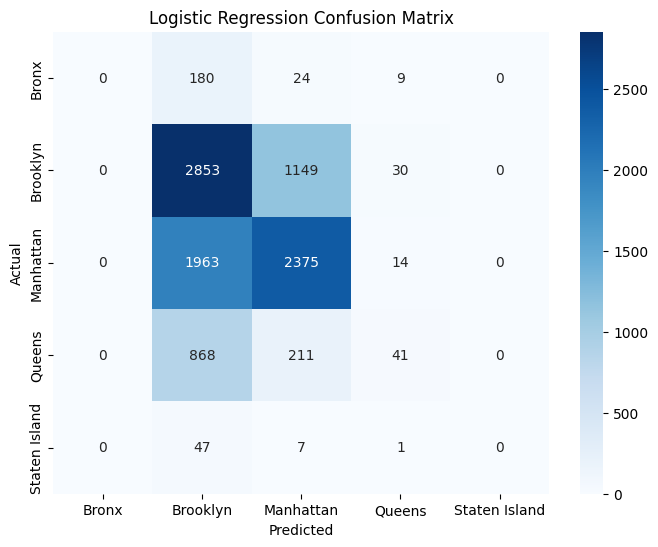

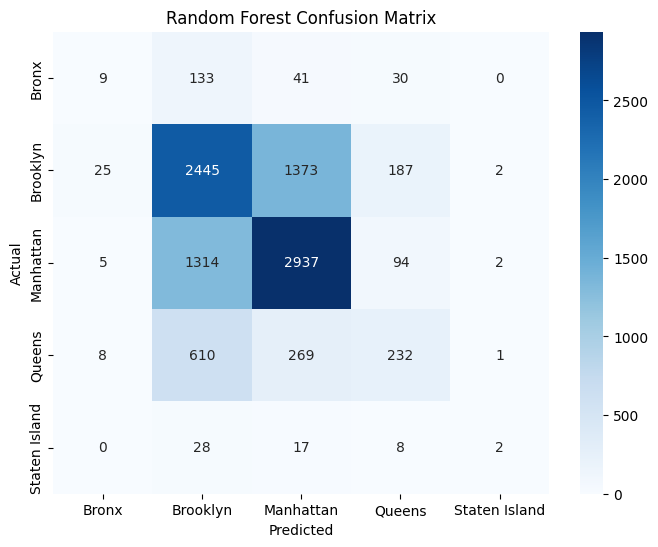

In [23]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=lr.classes_)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=lr.classes_, yticklabels=lr.classes_, cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

# This matrix shows us the true positive (diagonals), false positives & false negatives
# The diagonal values are higher than off diagonal values which means model performs well.
# However, the off diagonal values are not low compared to the diagonal values which means we have a high numbers of false positives & false negatives.

**5. Deployment and Monitoring**

*Propose a method for deploying the best-performing model into a production environment.*


*  Save the trained model using joblib or pickle.
*  Build an API (Using Flask or FastAPI) to load the model and preprocessing pipeline inside the API.
*  Deploy to a Cloud Platform like AWS
*  Secure and Scale
*  Monitor the model
*  Enable Continuous Improvement by scheduling regular model retraining with new data.
*  Continuous Integration / Continuous Deployment

In [24]:
# Save the trained model using joblib or pickle.
# Build an API (Using Flask or FastAPI) to load the model and preprocessing pipeline inside the API.
# Deploy to a Cloud Platform like AWS
# Secure and Scale
# Monitor the model
# Enable Continuous Improvement by scheduling regular model retraining with new data.
# Continuous Integration / Continuous Deployment

['random_forest_model.pkl']

*Discuss potential issues that could arise during deployment and operation, including how to handle incoming real-time data.*


*   Real world data may change over time like new neighborhoods or pricing affecting model accuracy.

    To avoid that we can: Set up alerts if prediction confidence or accuracy drops.

*   If the model is not retrained regularly, it may no longer reflect current trends.

    To avoid that we can: Schedule periodic retraining using new data.

*  The production input might differ in structure, format or have misisng values.

    To avoid that we can: Implement input validation and schema checks before making predictions.



*Suggest strategies for ongoing monitoring and maintenance of the model.*

1. Prediction Monitoring
*   Track these model outputs:

      Class distribution

      Confidence scores: Monitor prediction confidence levels over time. A consistent drop may signal that the model is degrading in accuracy.
      
      Prediction latency: Measure how long the model takes to respond. Increased latency could indicate performance bottlenecks.

2. Retraining Triggers
*   Retrain the model when:

      Drift is detected

      Accuracy drops

      Business rules change

